# Review Data EDA

In [1]:
%matplotlib inline
import numpy as np
import math
import matplotlib.pyplot as plt
import pandas as pd
import datetime
from glob import glob

import seaborn as sns
sns.set_style('whitegrid')
sns.set_context("poster")

In [2]:
def time_marker(text=''):
    print('[{}] {}'.format(datetime.datetime.now().time(), text))

In [3]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

import matplotlib
font = {'size' : 50}
matplotlib.rc('font', **font)

TITLE_FONT_SIZE = 25
LABEL_FONT_SIZE = 15
TICK_FONT_SIZE  = 15

FIG_SIZE = (15,6)
FIG_SIZE_SHORT = (15,3)
GRID_DIMS = 15

DO_WRITE_CHARTS = False
DRY_RUN = False

# Load Restaurant Business Data

In [4]:
restaurants = pd.read_csv('../clean_data/_analysis/restaurants.csv', index_col=0)

restaurant_ids = list(restaurants.business_id)
print('Collected {:d} restaurant business_ids'.format(len(restaurant_ids)))

# Load Review Data

In [5]:
time_marker(text='Loading Review Data...')

reviews = pd.DataFrame()
file_path_slug = '../clean_data/reviews/*.csv'
file_list = glob(file_path_slug)


# Chunk Settings
chunks = list()
chunksize = 10000
for ii, file in enumerate(sorted(file_list)):
    time_marker('Reading {} of {} {}...'.format(ii+1, len(file_list), file))
    num_chunks = math.ceil(sum(1 for row in open(file, 'r'))/chunksize)
    format_width = len(str(num_chunks))

    # import file in chunks
    for jj, chunk in enumerate(pd.read_csv(file, chunksize=chunksize, iterator=True, index_col=0, parse_dates=['date'])):

        # drop reviews with missing review text
        chunk = chunk[(~chunk.text.isnull()) & (~chunk.user_id.isnull())].copy()
        
        # drop reviews for businesses not in restarunt business_id list
        chunk = chunk[chunk.business_id.isin(restaurant_ids)].copy()
        
        # append chunk to chunks list
        chunks.append(chunk)
        
time_marker(text='merging to dataframe...')
reviews = pd.concat(chunks)

time_marker('reseting index...')
reviews.reset_index(inplace=True, drop=True)
time_marker(text='Complete!')


[15:27:51.807244] Reading 17 of 64 ../clean_data/reviews/16_F_reviews_clean.csv...
[15:27:53.089856] Reading 18 of 64 ../clean_data/reviews/17_G_reviews_clean.csv...
[15:27:54.358701] Reading 19 of 64 ../clean_data/reviews/18_H_reviews_clean.csv...
[15:27:55.656524] Reading 20 of 64 ../clean_data/reviews/19_I_reviews_clean.csv...
[15:27:56.987722] Reading 21 of 64 ../clean_data/reviews/20_J_reviews_clean.csv...
[15:27:59.409851] Reading 22 of 64 ../clean_data/reviews/21_K_reviews_clean.csv...
[15:28:01.142831] Reading 23 of 64 ../clean_data/reviews/22_L_reviews_clean.csv...
[15:28:02.750377] Reading 24 of 64 ../clean_data/reviews/23_M_reviews_clean.csv...
[15:28:04.140480] Reading 25 of 64 ../clean_data/reviews/24_N_reviews_clean.csv...
[15:28:05.595194] Reading 26 of 64 ../clean_data/reviews/25_O_reviews_clean.csv...
[15:28:07.119103] Reading 27 of 64 ../clean_data/reviews/26_P_reviews_clean.csv...
[15:28:08.434325] Reading 28 of 64 ../clean_data/reviews/27_Q_reviews_clean.csv...
[15:

In [6]:
reviews['date'] = pd.to_datetime(reviews['date'])

reviews['cool']             = reviews['cool'].astype(int)
reviews['funny']            = reviews['funny'].astype(int)
reviews['stars']            = reviews['stars'].astype(int)

reviews['useful'].fillna(0, inplace=True)
reviews['useful']           = reviews['useful'].astype(int)

reviews['review_length']    = reviews['review_length'].astype(int)

In [7]:
reviews.head()

,business_id,cool,date,funny,review_id,stars,text,useful,user_id,review_length
0,-QOz-2NrDkXjgKYEGBQZhA,0,2011-10-04,0,FERZQal0cYWKf8rVceC24w,3,thought we were coming in to dozo but instead ...,0,P2E31XC7SP4v_3hXC2o0Xw,815
1,-QOz-2NrDkXjgKYEGBQZhA,0,2012-02-07,1,itCQYxlnjfnQPKQBU0K_dw,1,the atmosphere is great but saw the waitress p...,0,1P2GTkfjzlkJHZ4AQJYKbw,103
2,-QOz-2NrDkXjgKYEGBQZhA,0,2012-10-04,0,T4JbEoTfq9O2f9Gzdd5Siw,3,had dinner here and it wasnt bad at all all yo...,1,GAf5JaZu2kNiFzrWjaWssw,244
3,-QOz-2NrDkXjgKYEGBQZhA,0,2012-06-05,0,z7rXEvMWBZotEbxM6qABQQ,3,tried this place for the first time today asid...,0,eG09GDBWdQeWtSJdsP_pCw,1263
4,-QOz-2NrDkXjgKYEGBQZhA,0,2012-11-07,0,tVkibM9wZgaxHi-TuxGrXA,2,in a word bland everything about this place is...,0,MVDtvZZgxSji8NxmCeg50w,451


In [8]:
for col in reviews.columns:
    print('{} unique {} values'.format(str(len(reviews[col].unique())).rjust(10), col.ljust(12)))

     33497 unique business_id  values
       119 unique cool         values
      4313 unique date         values
       102 unique funny        values
   1676904 unique review_id    values
         5 unique stars        values
   1676354 unique text         values
       127 unique useful       values
    589677 unique user_id      values
      4871 unique review_length values


# Exploratory Data Analysis

## Distribution of Star Ratings

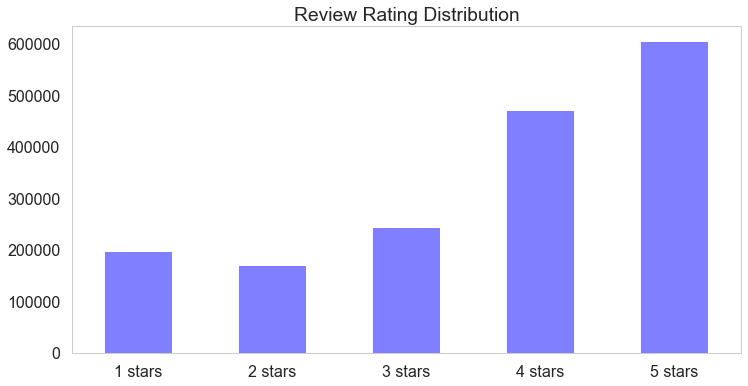

In [9]:
ax = reviews.groupby('stars').count()['review_id'].plot(kind='bar', figsize=(12,6), color='b', alpha=0.5)

ax.set_xticklabels(['{:d} stars'.format(i+1) for i in range(0,5)], rotation=0)
ax.set_xlabel('')

ax.set_title('Review Rating Distribution')
ax.grid('off')

plt.show()
plt.close()

## Distribution of Review Count per User

In [10]:
def plot_rating_distributions(df=None, title=''):
    user_review_count = df.groupby('user_id').count()['review_id']
    
#     time_marker('collecting single_reviewers...')
    one_review_users = user_review_count[user_review_count > 1.0].index
    single_reviewers = df[df.user_id.isin(one_review_users)].copy()

#     time_marker('collecting multi_reviewers...')
    multi_reviewers = df[~df.user_id.isin(one_review_users)].copy()
    
    # group reviews by star count
    all_reviews    = df.groupby('stars').count()['review_id']
    all_reviews = all_reviews.reindex(pd.RangeIndex(1,6)).fillna(0)
        
    single_reviews = single_reviewers.groupby('stars').count()['review_id']
    single_reviews = single_reviews.reindex(pd.RangeIndex(1,6)).fillna(0)
    
    multi_reviews  = multi_reviewers.groupby('stars').count()['review_id']
    multi_reviews = multi_reviews.reindex(pd.RangeIndex(1,6)).fillna(0)
    
    max_review_count = max([all_reviews.max(), single_reviews.max(), multi_reviews.max()])
       
    fig = plt.figure(figsize=(15,15))
    ax0 = fig.add_subplot(311)
    ax1 = fig.add_subplot(312)
    ax2 = fig.add_subplot(313)
    
    sns.barplot(x=all_reviews.index, y=all_reviews, ax=ax0, data=all_reviews, color='b', alpha=0.35)
    sns.barplot(x=single_reviews.index, y=single_reviews, ax=ax1, data=single_reviews, color='r', alpha=0.35)
    sns.barplot(x=multi_reviews.index, y=multi_reviews, ax=ax2, data=multi_reviews, color='g', alpha=0.35)

    ax0.set_xticks([i for i in range(0,5)])
    ax0.set_xticklabels(['{:d} stars'.format(i+1) for i in range(0,5)], rotation=0)
    ax0.set_xlabel('Star Rating')
    ax0.set_ylabel('Number of Reviews')
    
    ax_title = 'Reviews from All Users'
    if title != '':
        ax_title = '{} - {}'.format(ax_title, title)
    ax0.set_title(ax_title)
    ax0.grid('off')

    
    ax1.set_xticks([i for i in range(0,5)])
    ax1.set_xticklabels(['{:d} stars'.format(i+1) for i in range(0,5)], rotation=0)
    ax1.set_xlabel('Star Rating')
    ax1.set_ylabel('Number of Reviews')
    
    ax_title = 'Reviews from Users with a Single Review'
    if title != '':
        ax_title = '{} - {}'.format(ax_title, title)
    ax1.set_title(ax_title)
    ax1.grid('off')

    
    ax2.set_xticks([i for i in range(0,5)])
    ax2.set_xticklabels(['{:d} stars'.format(i+1) for i in range(0,5)], rotation=0)
    ax2.set_xlabel('Star Rating')
    ax2.set_ylabel('Number of Reviews')
    
    ax_title = 'Reviews from Users with Multiple Reviews'
    if title != '':
        ax_title ='{} - {}'.format(ax_title, title)
    ax2.set_title(ax_title)
    ax2.grid('off')

    plt.tight_layout()
#     plt.show()
    filename = '../charts/reviews_{}.png'.format(title.lower().replace(' ','_').replace('_-_', '_'))
    print(filename)
    plt.savefig(filename)
    plt.close()
    

In [11]:
plot_rating_distributions(df=reviews, title='All Countries')

../charts/reviews_all_countries.png


# Write Restaurant Reviews to File

In [12]:
time_marker('writing to file...')
reviews.to_csv('../clean_data/_analysis/restaurant_reviews_all.csv', encoding=('utf-8'))
time_marker('done')

[15:29:23.530315] writing to file...
[15:30:19.969746] done


# Append country to review

In [13]:
import googlemaps
from time import sleep
import urllib.request
import os
GOOGLE_MAPS_KEY = os.environ.get('GOOGLE_MAPS_KEY')

In [14]:
gmaps = googlemaps.Client(key=GOOGLE_MAPS_KEY)

def get_country(lat, long):
    geocode_result = gmaps.reverse_geocode((lat,long))
    return geocode_result[0]['address_components'][-2]['long_name']

In [15]:
time_marker('merging location information...')
reviews_loc = reviews.merge(restaurants[['business_id', 'state', 'city']], left_on='business_id', right_on='business_id')

time_marker('lookup country with Google Geocode API...')
country_lookup = restaurants.groupby('state').mean()[['latitude', 'longitude']]
country_lookup['country'] = country_lookup.apply(lambda row: get_country(row.latitude, row.longitude), axis=1)

time_marker('correcting missing country names...')
country_lookup.reset_index(inplace=True, drop=False)
country_lookup.sort_values(['country', 'state'], inplace=True)
country_lookup.iloc[0,3] = 'United States'
country_lookup.iloc[1,3] = 'United States'
country_lookup.iloc[3,3] = 'Argentina'

country_lookup.sort_values(['country', 'state'], inplace=True)
country_lookup.reset_index(inplace=True, drop=True)

time_marker('merge country to review...')
reviews_loc = reviews_loc.merge(country_lookup[['state', 'country']], left_on='state', right_on='state')
time_marker('done!')

[15:30:20.394148] merging location information...
[15:30:22.103008] lookup country with Google Geocode API...
[15:30:34.637119] correcting missing country names...
[15:30:34.648869] merge country to review...
[15:30:35.724990] done!


# Select Only Reviews in Countries with more than 100 reviews

In [16]:
reviews_loc.groupby('country').count()['review_id']

country
Argentina              88
Austria                 5
Belgium                 4
Canada             327956
Germany             13261
Italy                   4
Norway                 19
Scotland               70
United Kingdom      11825
United States     1323672
Name: review_id, dtype: int64

In [17]:
reviews_loc = reviews_loc[reviews_loc.country.isin(['Canada','Germany','United Kingdom','United States'])].copy()

In [18]:
file_name = '../clean_data/_analysis/restaurant_reviews_top_countries.csv'
reviews_loc.to_csv(file_name, encoding='utf-8')

In [19]:
for country in reviews_loc.country.unique():
    df = reviews_loc[reviews_loc.country == country].copy()
    plot_rating_distributions(df=df, title='{}'.format(country))

../charts/reviews_canada.png
../charts/reviews_united_states.png
../charts/reviews_germany.png
../charts/reviews_united_kingdom.png


# Write to file for each Country

In [20]:
time_marker(text='Writing to file...')
for i, prefix in enumerate(sorted(reviews_loc.country.unique())):

    # take subset of busineses and trim business_id_refix column
    df = reviews_loc[reviews_loc.country == prefix].iloc[:,:-1].copy()

    df.reset_index(inplace=True, drop=True)
    file_name = '../clean_data/_analysis/restaurant_reviews_{}.csv'.format(prefix.lower().replace(' ','_'))
    
    time_marker(text='Writing {:d} records to file {}'.format(df.shape[0], file_name))
    if DRY_RUN:
        pass
    else:
        df.to_csv(file_name, encoding='utf-8')
time_marker(text='Done!')

[15:31:49.254156] Writing to file...
[15:31:49.662498] Writing 327956 records to file ../clean_data/_analysis/restaurant_reviews_canada.csv
[15:32:01.824572] Writing 13261 records to file ../clean_data/_analysis/restaurant_reviews_germany.csv
[15:32:02.567925] Writing 11825 records to file ../clean_data/_analysis/restaurant_reviews_united_kingdom.csv
[15:32:03.962968] Writing 1323672 records to file ../clean_data/_analysis/restaurant_reviews_united_states.csv
[15:32:49.612547] Done!
